---
## The Perceptron 

### The Perceptron Algorithm Introduction
In machine learning, the Perceptron algorithm is a two-class (binary) classification algorithm. Binary classification is a form of classification, the process of predicting categorical variables, where the output is restricted to two classes, and it can be used in many data science field. It is a type of neural network model, perhaps the simplest type of neural network model. It consists of a single node or neuron that takes a row of data as input and predicts a class label.
We will implement and train this model by using the palmer penguins dataset, which is in the Datasets folder.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

penguins = pd.read_csv("/Users/mingzeyuan/Desktop/Rice/22 Spring/INDE577/Final/Data/palmer_penguins.csv")

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = penguins[['species', 'bill_length_mm','bill_depth_mm']]
df = df.query('species != "Chinstrap"')
df = df.dropna()

In [4]:
y = df.iloc[:,0].values

y = np.where(y == 'Adelie', -1, 1)

X = df.iloc[:,[1,2]].values

---

This framework is for implementing a single neuron model. Thus, we next write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, an input method, and a predict method. Please run the following code in the cell below. 


---

In [5]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

---

Next we instantiate an instance of the ```Perceptron``` class and also train this instance over 25 epochs by running the following code in the cell below. 


---

In [6]:
percep = Perceptron(epochs = 25)

percep.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X``` by running the following code in the cell below.

---

In [7]:
y_hat = percep.predict(X)

print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

---

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function imported at the top of this notebook. This function will scatter the iris data in the plane and also show the regions of space where a given point will be classified either -1 or 1. It super easy to use and I'm glad I found it! Try running the following code in the cell below.

---

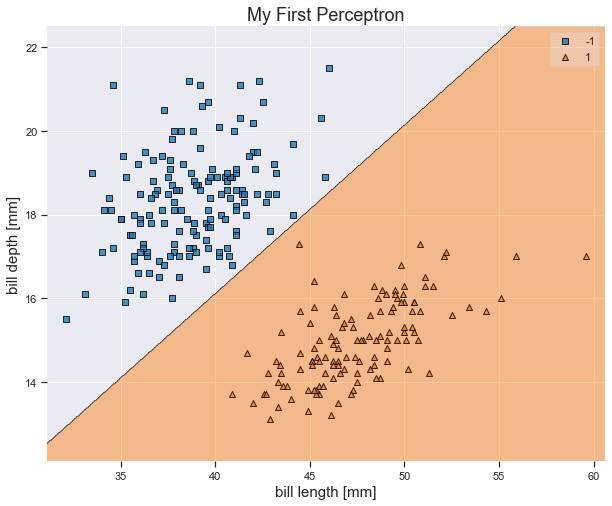

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

---

As we can see from the output of the code above, we have found a nice linear seperator which has classified our data. But how long did our perceptron model train for? Luckily, when we defined our ```Perceptron``` class we stored the error incured by the model at each iteration of an epoch in the ```errors_``` attribute. We can view these errors over each epoch by running the following code in the cell below. 

---

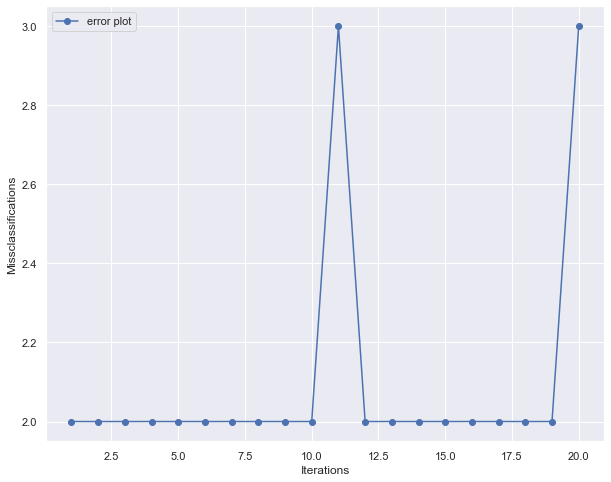

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()